# Decision Trees


In this lab exercise, You will use this classification algorithm to build a model from the __historical data of patients__ , and their response to different medications.\
we will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install scipy

In [79]:
import numpy as np 
import pandas as pd
from sklearn import metrics 
from sklearn import tree 
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.tree import plot_tree

 <h2>Downloading the Data</h2>

In [22]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)

In [23]:
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

In [24]:
df= my_data

In [25]:
df.groupby('Drug').count()

,Age,Sex,BP,Cholesterol,Na_to_K
Drug,,,,,
drugA,23,23,23,23,23
drugB,16,16,16,16,16
drugC,16,16,16,16,16
drugX,54,54,54,54,54
drugY,91,91,91,91,91


In [92]:
my_data.shape

(200, 6)

__Remove the column containing the target name since it doesn't contain numeric values.__

In [34]:
df['BP'] = df['BP'].replace({"HIGH": 1, "NORMAL": 2,"LOW": 3 })
df['Cholesterol'] = df['Cholesterol'].replace({"HIGH": 1, "NORMAL": 2 })
df['Sex'] = df['Sex'].replace({"M": 1, "F": 0 })

In [35]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,drugY
1,47,1,3,1,13.093,drugC
2,47,1,3,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,3,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,3,1,11.567,drugC
196,16,1,3,1,12.006,drugC
197,52,1,2,1,9.894,drugX
198,23,1,2,2,14.020,drugX


As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.

In [93]:
X= df[['Age','Sex','BP','Cholesterol','Na_to_K']]
y=df['Drug']

In [94]:
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [95]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [96]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [42]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [43]:
print('Shape of X_testset  set {}'.format(X_testset.shape),'&',' Size of y_testset set {}'.format(y_testset.shape))

Shape of X_testset  set (60, 5) &  Size of y_testset set (60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [97]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [98]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [86]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.

In [87]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [88]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>

In [99]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

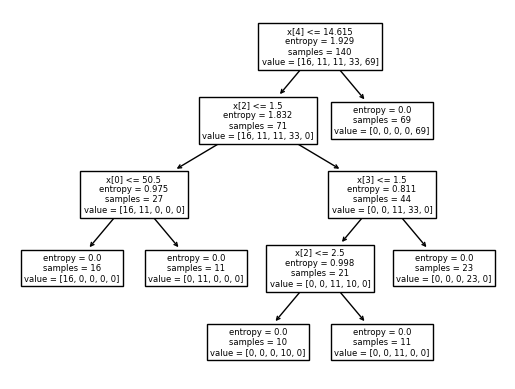

In [100]:
tree.plot_tree(drugTree)
plt.show()

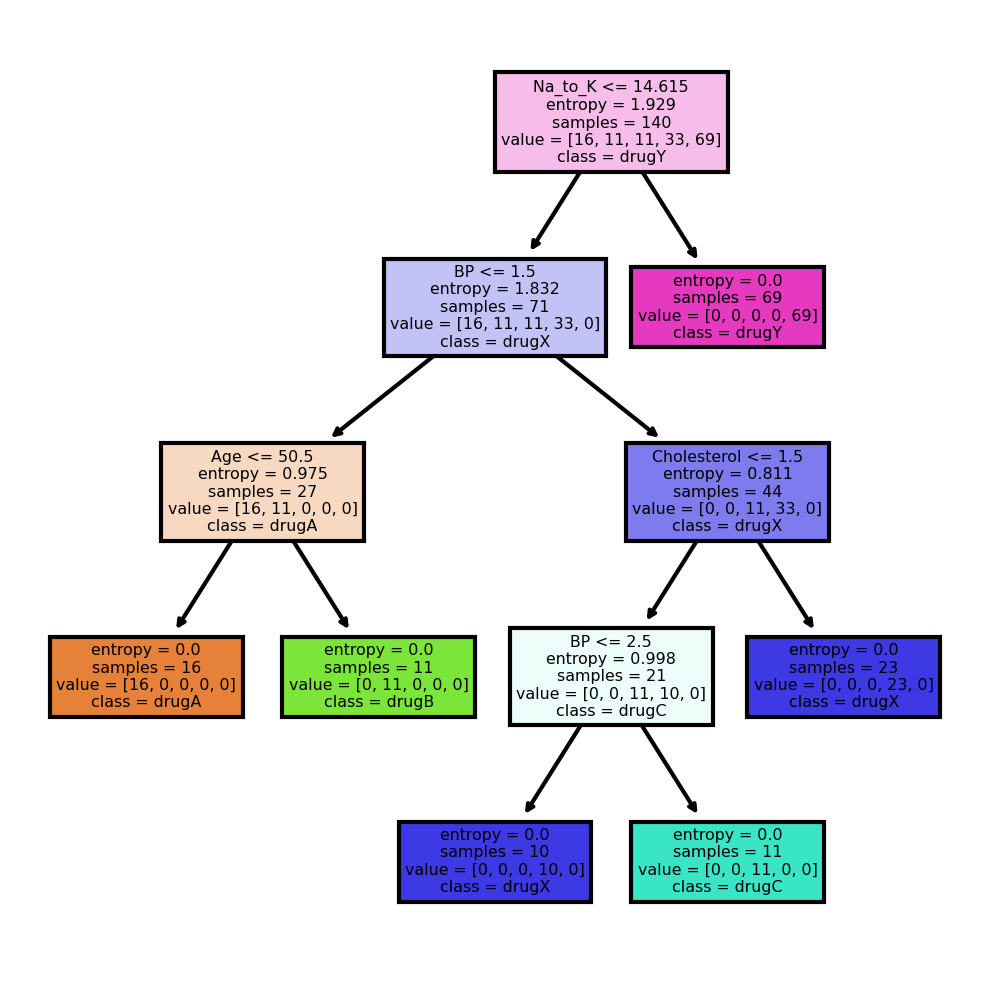

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(drugTree, filled=True, feature_names=X.columns, class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], ax=axes)
plt.show()